In [3]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
SourceTech_data = pd.read_excel("SourceTech Bills.xlsx")
Alltronix_data= pd.read_excel("AlltronixBills.xlsx")

In [5]:
SourceTech_data.head()

,Sl. No.,Number,Invoice,Name,Document Date,Packing slip,Batch number,Product Receipt Date,Item number,Unit,...,Physical date,Purchase Price,Currency,Line Amount,Item Description,Warehouse,Location,Quantity,Physical cost amount,Financial cost amount
0,1.0,PO-00033227,P 12206,Source Technologi,2020-02-20,P 12206,200225-00033,2020-02-25,RER004248-03,Nos,...,2020-02-25,4500.0,INR,2250.0,"Res SMT,2512 10R,±1%,1W,±70 C ,Thick Film",REC-WH,RX-EMS,500,2250.0,2350.00
1,2.0,PO-00027908,P 7897,Source Technologi,2019-10-26,P 7897,191031-00070,2019-10-31,REC013542-06,Nos,...,2019-10-31,2550.0,INR,21675.0,CAP SMT CER 1.5UF 50V X5R 0805,REC-WH,RX-EMS,8500,21675.0,21800.00
2,3.0,PO-00034412,Q 484,Source Technologi,2020-05-16,Q 484,200523-00043,2020-05-23,RBC001018-04,Nos,...,2020-05-23,1844.0,INR,212060.0,CAPACITOR TMEL 22µF ±10% 35V,REC-WH,RX-EMS,115,212060.0,212125.75
3,4.0,PO-00018918,O 9593,Source Technologi,2018-12-04,O 9593,181208-00014,2018-12-08,REC001044-27,Nos,...,2018-12-08,1500.0,INR,6000.0,"CAP SMT 0.01µF,±10%,6.3V,-55°C to +125°C,0201X...",REC-WH,RX-EMS,4000,6000.0,6030.56
4,5.0,PO-00017155,O 7536,Source Technologi,2018-10-27,O 7536,181015-00036,2018-10-29,NPD02485,Nos,...,2018-10-15,1496.0,INR,10472.0,ADC Dual 12-Bit 10MSPS 3V,REC-WH,RX-EMS,7,10472.0,10549.91


In [6]:
Alltronix_data.head()

,Sl. No.,Number,Invoice,Name,Document Date,Packing slip,Batch number,Product Receipt Date,Item number,Unit,...,Physical date,Purchase Price,Currency,Line Amount,Item Description,Warehouse,Location,Quantity,Physical cost amount,Financial cost amount
0,1.0,PO-00022840,192002429.0,Alltronix,2019-06-18,192002429.0,190621-00093,2019-06-21,REH008037-34,Nos,...,2019-06-21,248.0,INR,19840.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,80,19840,19840
1,2.0,PO-00008050,1709320.0,Alltronix,2017-12-15,1709320.0,171218-00024,2017-12-18,REH008037-34,Nos,...,2017-12-18,225.0,INR,225000.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,1000,225000,225000
2,3.0,PO-00019338,181911852.0,Alltronix,2019-02-06,181911852.0,190212-00033,2019-02-12,REH008037-34,Nos,...,2019-02-12,225.0,INR,135000.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,60,13500,13500
3,4.0,PO-00019338,181912498.0,Alltronix,2019-02-06,181912498.0,190225-00020,2019-02-12,REH008037-34,Nos,...,2019-02-25,225.0,INR,135000.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,540,121500,121500
4,5.0,PO-00032201,192010876.0,Alltronix,2020-06-27,192010876.0,200717-00001,2020-07-17,REH008037-34,Nos,...,2020-07-17,225.0,INR,57825.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,257,57825,57825


In [7]:
SourceTech_data.columns.difference(Alltronix_data.columns)

Index([], dtype='object')

In [8]:
SourceTech_data.shape

(1608, 21)

In [9]:
SourceTech = SourceTech_data 
Alltronix = Alltronix_data

In [10]:
SourceTech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sl. No.                1607 non-null   float64       
 1   Number                 1607 non-null   object        
 2   Invoice                1547 non-null   object        
 3   Name                   1607 non-null   object        
 4   Document Date          1596 non-null   datetime64[ns]
 5   Packing slip           1607 non-null   object        
 6   Batch number           1607 non-null   object        
 7   Product Receipt Date   1606 non-null   datetime64[ns]
 8   Item number            1607 non-null   object        
 9   Unit                   1605 non-null   object        
 10  Financial date         1607 non-null   datetime64[ns]
 11  Physical date          1607 non-null   datetime64[ns]
 12  Purchase Price         1607 non-null   float64       
 13  Cur

In [11]:
SourceTech.describe()

,Sl. No.,Purchase Price,Line Amount,Quantity,Physical cost amount,Financial cost amount
count,1607.000000,1607.000000,1607.000000,1.608000e+03,1.608000e+03,1.548000e+03
mean,804.000000,37.589035,10214.985706,9.327239e+03,1.582769e+04,1.654546e+04
std,464.045256,196.150259,30924.589382,1.874748e+05,3.182352e+05,3.263632e+05
min,1.000000,0.000000,-31500.000000,-3.500000e+04,-5.250000e+04,-3.456750e+04
25%,402.500000,0.120000,400.000000,5.000000e+02,4.000000e+02,4.500000e+02
50%,804.000000,0.600000,1500.000000,2.000000e+03,1.400000e+03,1.452875e+03
75%,1205.500000,3.670000,6600.000000,5.000000e+03,5.528750e+03,5.698807e+03
max,1607.000000,4500.000000,378000.000000,7.499100e+06,1.272546e+07,1.280618e+07


In [12]:
SourceTech.isna().sum()

Sl. No.                   1
Number                    1
Invoice                  61
Name                      1
Document Date            12
Packing slip              1
Batch number              1
Product Receipt Date      2
Item number               1
Unit                      3
Financial date            1
Physical date             1
Purchase Price            1
Currency                  1
Line Amount               1
Item Description          1
Warehouse                 1
Location                  1
Quantity                  0
Physical cost amount      0
Financial cost amount    60
dtype: int64

In [13]:
Alltronix.isna().sum()

Sl. No.                  1
Number                   1
Invoice                  1
Name                     1
Document Date            1
Packing slip             1
Batch number             1
Product Receipt Date     1
Item number              1
Unit                     1
Financial date           1
Physical date            1
Purchase Price           1
Currency                 1
Line Amount              1
Item Description         1
Warehouse                1
Location                 1
Quantity                 0
Physical cost amount     0
Financial cost amount    0
dtype: int64

In [14]:
SourceTech.Number

0       PO-00033227
1       PO-00027908
2       PO-00034412
3       PO-00018918
4       PO-00017155
           ...     
1603    PO-00034353
1604    PO-00034353
1605    PO-00034353
1606    PO-00035375
1607            NaN
Name: Number, Length: 1608, dtype: object

In [15]:
SourceTech["source"] = "SourceTech"
Alltronix["source"] = "Alltronix"

In [16]:
Alltronix

,Sl. No.,Number,Invoice,Name,Document Date,Packing slip,Batch number,Product Receipt Date,Item number,Unit,...,Purchase Price,Currency,Line Amount,Item Description,Warehouse,Location,Quantity,Physical cost amount,Financial cost amount,source
0,1.0,PO-00022840,192002429.0,Alltronix,2019-06-18,192002429.0,190621-00093,2019-06-21,REH008037-34,Nos,...,248.0,INR,19840.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,80,19840,19840,Alltronix
1,2.0,PO-00008050,1709320.0,Alltronix,2017-12-15,1709320.0,171218-00024,2017-12-18,REH008037-34,Nos,...,225.0,INR,225000.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,1000,225000,225000,Alltronix
2,3.0,PO-00019338,181911852.0,Alltronix,2019-02-06,181911852.0,190212-00033,2019-02-12,REH008037-34,Nos,...,225.0,INR,135000.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,60,13500,13500,Alltronix
3,4.0,PO-00019338,181912498.0,Alltronix,2019-02-06,181912498.0,190225-00020,2019-02-12,REH008037-34,Nos,...,225.0,INR,135000.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,540,121500,121500,Alltronix
4,5.0,PO-00032201,192010876.0,Alltronix,2020-06-27,192010876.0,200717-00001,2020-07-17,REH008037-34,Nos,...,225.0,INR,57825.0,Conn DIN-SIGNAL 2C048MS-3 0C1-2-V2-CL,REC-WH,RX-EMS,257,57825,57825,Alltronix
5,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1937,437665,437665,Alltronix


In [17]:
df = pd.concat([SourceTech ,Alltronix])

In [18]:
df.isna().sum()

Sl. No.                   2
Number                    2
Invoice                  62
Name                      2
Document Date            13
Packing slip              2
Batch number              2
Product Receipt Date      3
Item number               2
Unit                      4
Financial date            2
Physical date             2
Purchase Price            2
Currency                  2
Line Amount               2
Item Description          2
Warehouse                 2
Location                  2
Quantity                  0
Physical cost amount      0
Financial cost amount    60
source                    0
dtype: int64

In [19]:
df.shape

(1614, 22)

In [20]:
df["Number"].nunique()

658

In [21]:
df["Number"].value_counts()

PO-00014703    23
PO-00016712    23
PO-00014304    22
PO-00005130    22
PO-00004985    20
               ..
PO-00024731     1
PO-00016420     1
PO-00014595     1
PO-00016538     1
PO-00032677     1
Name: Number, Length: 658, dtype: int64

In [22]:
df["Invoice"].isna().sum()

62

In [23]:
df.iloc[0:100,1]

0     PO-00033227
1     PO-00027908
2     PO-00034412
3     PO-00018918
4     PO-00017155
         ...     
95    PO-00034411
96    PO-00016712
97    PO-00034794
98    PO-00016712
99    PO-00016954
Name: Number, Length: 100, dtype: object

In [24]:
df["Quantity"].nunique()

201

In [25]:
df["Quantity"].unique()

array([    500,    8500,     115,    4000,       7,    6000,    5000,
          3000,      33,     135,   15000,   35000,    8000,    1000,
         25000,       2,      59,      88,    2000,      12,    1500,
          2500,    4500,   10000,       6,       3,      10,      18,
           490,    4510,     231,     200,      21,     205,     971,
            34,      25,      40,    4800,      14,      44,      23,
           300,      27,      22,      84,      67,     100,    1200,
           150,      13,      15,       4,   20000,     890,    1010,
          1485,     240,    1425,     224,    1974,    1026,     400,
            32,     750,     285,     130,     600,    2195,    7805,
         14850,    2100,      30,   -2500,     380,      35,      50,
            20,   24000,  120000,   30000,   45000,     250,    3500,
          9855,  105145,     575,   -2000,     260,     550,    1100,
           332,     268,    9400,   16000,     700,      70,     -70,
           110,    7

In [26]:
df["Quantity"].value_counts()

1000     205
5000     151
2000     145
500      127
3000      98
        ... 
4800       1
13000      1
750        1
19200      1
1800       1
Name: Quantity, Length: 201, dtype: int64

<AxesSubplot:>

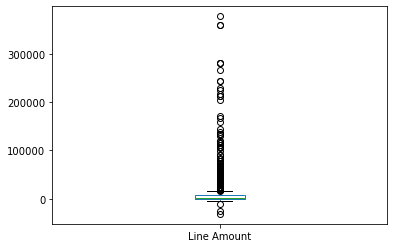

In [27]:
df["Line Amount"].plot(kind = "box")

<AxesSubplot:ylabel='Frequency'>

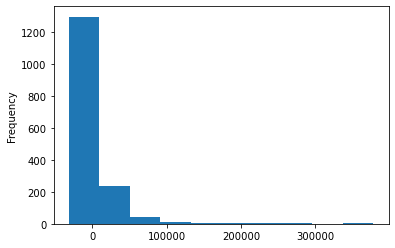

In [28]:
df["Line Amount"].plot(kind = "hist")

In [29]:
df["Line Amount"].value_counts()

500.00       33
150.00       32
600.00       32
0.00         31
300.00       29
             ..
7750.00       1
371.25        1
3670.00       1
19250.00      1
229600.00     1
Name: Line Amount, Length: 547, dtype: int64

In [30]:
df.sort_values(by = ["Quantity", "Line Amount"])

,Sl. No.,Number,Invoice,Name,Document Date,Packing slip,Batch number,Product Receipt Date,Item number,Unit,...,Purchase Price,Currency,Line Amount,Item Description,Warehouse,Location,Quantity,Physical cost amount,Financial cost amount,source
1155,1156.0,PO-00011499,NaN,Source Technologi,2018-03-23,N 11658,180407-00269,2018-04-07,RER004035-07,Nos,...,0.15,INR,5250.0,RES SMD 100K OHM 1% 1/8W 0805,REC-WH,RX-EMS,-35000,-5250.00,NaN,SourceTech
1411,1412.0,PO-00016094,NaN,Source Technologi,2018-08-08,O 5229,180821-00147,2018-08-09,RER009546-09,Nos,...,0.00,INR,7440.0,RES SMT Thick Film 0402 100K Ohm 1% 0.1W(1/10W),REC-WH,RX-EMS,-30000,-7200.00,NaN,SourceTech
598,599.0,PO-00011757,NaN,Source Technologi,2018-03-24,N 11720,180327-00001,2018-03-27,REC008950-10,Nos,...,1.75,INR,52500.0,"CAP SMT 0.22µF,±10%,10V,0201,X5R",REC-WH,RX-EMS,-30000,-52500.00,NaN,SourceTech
1335,1336.0,PO-00013190,NaN,Source Technologi,2018-05-11,O 1545,180516-00137,2018-05-16,REC000852-10,Nos,...,0.00,INR,0.0,"CAP SMT 0.1µF,±10%,16V,-55°C to +85°C,0402,X5R...",REC-WH,RX-EMS,-25000,-18500.00,NaN,SourceTech
1337,1338.0,PO-00013190,NaN,Source Technologi,2018-05-11,O 1545,180519-00153,2018-05-16,REC000852-10,Nos,...,0.00,INR,0.0,"CAP SMT 0.1µF,±10%,16V,-55°C to +85°C,0402,X5R...",REC-WH,RX-EMS,-25000,-18500.00,NaN,SourceTech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,220.0,PO-00023131,P 1144,Source Technologi,2019-04-20,P 1144,190503-00115,2019-04-22,RER000019-08,Nos,...,15.00,INR,18000.0,"Res SMT 0201,22R,0.05W,5%,±200ppm/°Cc,Thick Film",REC-WH,RX-EMS,120000,18000.00,18000.00,SourceTech
1121,1122.0,PO-00023471,P 1538,Source Technologi,2019-05-06,P 1538,190514-00111,2019-05-10,REC001460-06,Nos,...,0.19,INR,28500.0,"CAP SMT 0.1µF,±10%,16V,X5R,0201,Ceramic",REC-WH,RX-EMS,150000,28500.00,28665.94,SourceTech
584,585.0,PO-00010784,N 10641,Source Technologi,2018-03-05,N 10641,180306-00054,2018-03-06,REC001045-10,Nos,...,1.89,INR,378000.0,"CAP SMT 4.7µF,±20%,10V,-55°C to +85°C,0402,X5R...",REC-WH,RX-EMS,200000,378000.00,378000.00,SourceTech
746,747.0,PO-00018279,O 8923,Source Technologi,2018-11-14,O 8923,181120-00156,2018-11-16,REC008950-10,Nos,...,0.88,INR,360800.0,"CAP SMT 0.22µF,±10%,10V,0201,X5R",REC-WH,RX-EMS,410000,360800.00,361100.00,SourceTech


In [31]:
df.loc[df["Line Amount"] == 0.000000,"Line Amount"] = np.NAN

In [32]:
df["Line Amount"].isna().sum()

33

<AxesSubplot:ylabel='Frequency'>

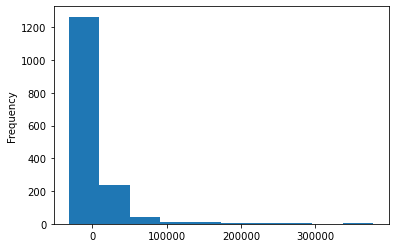

In [33]:
df["Line Amount"].plot(kind = "hist")

In [34]:
df["Purchase Price"].value_counts()

0.00       378
0.20        58
0.15        50
0.40        43
0.25        38
          ... 
13.89        1
1.29         1
13.61        1
60.01        1
1844.00      1
Name: Purchase Price, Length: 264, dtype: int64

In [35]:
df.columns

Index(['Sl. No.', 'Number', 'Invoice', 'Name', 'Document Date', 'Packing slip',
       'Batch number', 'Product Receipt Date', 'Item number', 'Unit',
       'Financial date', 'Physical date', 'Purchase Price', 'Currency',
       'Line Amount', 'Item Description', 'Warehouse', 'Location', 'Quantity',
       'Physical cost amount', 'Financial cost amount', 'source'],
      dtype='object')

In [36]:
df["Financial cost amount"].isna().sum()

60

<AxesSubplot:ylabel='Frequency'>

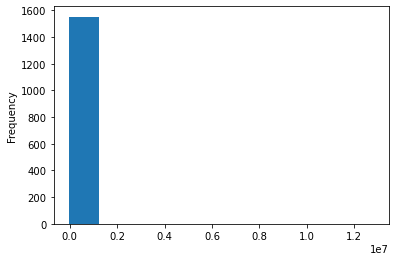

In [37]:
df["Financial cost amount"].plot(kind = "hist")

In [38]:
df["Currency"].value_counts()

INR    1610
USD       2
Name: Currency, dtype: int64

In [39]:
df["Currency"].nunique()

2

In [40]:
df["Currency"].isna().sum()

2

In [41]:
df["Item Description"].isna().sum()

2

In [42]:
df["Item Description"].value_counts()

Res SMT 60.4?,±0.5%,0.25W,±25ppm/°C,1210,Thin Flim         25
Res SMT 110K?,±1%,0.1W,±25PPM/°C,0603,Thin Flim            15
CAP SMT 1µF,±10%,10V,0402,X5R,Ceramic                      13
Res SMT 82.5K?,±1%,0.063W,±25ppm/°C,0603,Thin Flim         13
CAP SMT 0.1µF,±10%,50V,-55°C to +125°C,0603,X7R,Ceramic    12
                                                           ..
Capacitors MLCC - SMD/SMT 10UF 20% 6.3V,0402                1
CAP SMT 10µF,25V,X7R,1206                                   1
RESISTOR THKF CH 1M ±1% 0.25W ,1206,SMT,RoHS\n              1
SMD Ceramic Capacitor 100nF +/-10% 25V X7R/X5R 0603         1
RES SMD 2K OHM 1% 1/20W 0201                                1
Name: Item Description, Length: 978, dtype: int64

In [43]:
df["Item Description"].nunique()

978

In [44]:
df.groupby("Item Description").Currency.value_counts()

Item Description                                              Currency
"CAP , SMT , CER 3300PF 50V X7R 0603"                         INR         1
"CAP FXD CH CERG 22KpF\n+-10%100V"                            INR         1
"CAP SMT 0.1µF,±10%,50V,-55°C to +125°C,0603,X7R,Ceramic"     INR         1
"CAP SMT 0.1µF,±10%,50V,X7R,1206,Ceramic"                     INR         1
"CAP SMT 10µF,±10%,10V,55°C to +85°C,0603,X5R,Ceramic"        INR         1
                                                                         ..
Thin Film Resistors - SMD 1/8W 1.45K Ohms 0.1%                INR         1
Transistor SMT MOSFET,N-CH,60V,300MA, SOT23                   INR         3
Z-diode 0, 5W 13V 5% Minimelf                                 INR         2
Zener Diodes THT 56V                                          INR         1
need to use new internalP/N REC000735-10(GRM155R61A105KE15D)  INR         3
Name: Currency, Length: 979, dtype: int64

In [45]:
from datetime import datetime

In [46]:
datetime.now().year

2022

In [47]:
df["Physical cost amount"].value_counts()

900.0       33
450.0       33
600.0       33
150.0       32
500.0       32
            ..
5360.0       1
378.0        1
1620.0       1
4880.0       1
229600.0     1
Name: Physical cost amount, Length: 604, dtype: int64

In [48]:
del df["Item Description"]

In [49]:
df["Packing slip"].isna().sum()

2

In [50]:
df["Packing slip"].value_counts()

O 5868     22
O 3561     18
N 2908     17
O 2862     17
P 1146     14
           ..
O 12293     1
N 2464      1
Q 515       1
P 8558      1
O 7446      1
Name: Packing slip, Length: 864, dtype: int64

In [51]:
df.corr()

,Sl. No.,Purchase Price,Line Amount,Quantity,Physical cost amount,Financial cost amount
Sl. No.,1.000000,-0.315352,-0.178121,0.035396,-0.143615,-0.139947
Purchase Price,-0.315352,1.000000,0.078726,-0.010520,0.086793,0.085273
Line Amount,-0.178121,0.078726,1.000000,0.424554,0.883700,0.890361
Quantity,0.035396,-0.010520,0.424554,1.000000,0.996198,0.996276
Physical cost amount,-0.143615,0.086793,0.883700,0.996198,1.000000,1.000000
Financial cost amount,-0.139947,0.085273,0.890361,0.996276,1.000000,1.000000


In [55]:
#syntax for line plot

#plot(x,y)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
x=np.arangePurchase Price
y=Quantity

SyntaxError: invalid syntax (<ipython-input-57-f21bfcddec22>, line 1)